In [2]:
# Computational Physics Project 4 - Molecular Orbital Theory
# Ben Zager, Zach Faber-Manning, Michael Rosen

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import eigh,solve,norm

np.set_printoptions(precision=3)


In [3]:
# import Huckel matrices (adjacency matrix of carbon chain)

buta = np.loadtxt("butadiene.txt")
benz = np.loadtxt("benzene.txt")
tolu = np.loadtxt("toluene.txt")
naph = np.loadtxt("naphthalene.txt")
ethy = np.loadtxt("ethylene.txt")
buck = np.loadtxt("buckyball.txt")

In [92]:
# Select molecule

adj = buck

N = adj.shape[0] # number of carbons
Ne = N # number of electrons
db = 3 # number of double bonds (2 for butadiene, 3 for benzene/toluene, 5 for naphthalene, 30 for buckyball)

In [93]:
# Compute eigenvalues and eigenvectors

# gram schmidt method to orthonormalize eigenvectors
# M is a matrix with each column an eigenvector, V is new matrix
# adapted from andreask.cs.illinois.edu/cs357-s15/public/demos/05-orthgonality/Gram-Schmidt%20and%20Modified%20Gram-Schmidt.py
def gramSchmidt(M):
    n = M.shape[0]
    V = np.zeros([n,n])
    V[:,0] = M[:,0] / norm(M[:,0])

    for i in range(n):
        q = M[:,i]
        for j in range(i):
            q = q - np.dot(q,V[:,j])*V[:,j]
    
        V[:,i] = q/norm(q)
        
    return V
    

# Finds eigenvalues and eigenvectors
# args: adjacency matrix
# rets: tuple, (eigenvalues,eigenvectors) 
def getEigs(adj):
    eigs = eigh(adj)
    evals = np.flip(np.around(eigs[0],4),0) # eigenvalues
    evecs = np.flip(np.around(eigs[1],4),1) # eigenvectors
    
    evecs = gramSchmidt(evecs) # orthogonalize eigenvectors
    
    return (evals,evecs)

evals,evecs = getEigs(adj)

print("Eigenvalues\n")
for i in range(N):
    print(str(i+1)+" : a + "+str(np.around(evals[i],3))+"b  " + str(np.around(evecs[:,i],3)))


Eigenvalues

1 : a + 3.0b  [-0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129
 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129 -0.129]
2 : a + 2.757b  [ 0.     0.064  0.03  -0.055 -0.074  0.01  -0.056 -0.024  0.062  0.083
  0.147  0.156  0.2    0.218  0.186  0.074  0.147  0.145  0.071  0.027
 -0.109 -0.07  -0.112 -0.176 -0.174 -0.149 -0.196 -0.216 -0.182 -0.14   0.14
  0.182  0.216  0.196  0.149  0.174  0.176  0.112  0.07   0.109 -0.027
 -0.071 -0.145 -0.147 -0.074 -0.186 -0.218 -0.2   -0.156 -0.147 -0.083
 -0.062  0.024  0.056 -0.01   0.074  0.055 -0.03  -0.064  0.   ]
3 : a + 2.757b  [ 0.223  0.209  0.185  0.185  0.209  0.198  0.161  0.102  0.102  0.162
  0.168  0.145  0

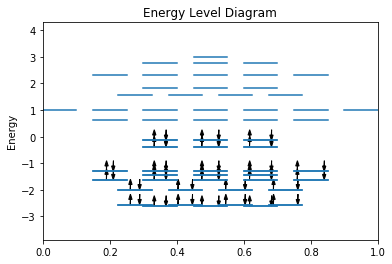

Electron energies: [-2.618 -2.618 -2.618 -2.618 -2.618 -2.618 -2.562 -2.562 -2.562 -2.562
 -2.562 -2.562 -2.562 -2.562 -2.    -2.    -2.    -2.    -2.    -2.    -2.
 -2.    -1.618 -1.618 -1.618 -1.618 -1.618 -1.618 -1.618 -1.618 -1.618
 -1.618 -1.438 -1.438 -1.438 -1.438 -1.438 -1.438 -1.303 -1.303 -1.303
 -1.303 -1.303 -1.303 -1.303 -1.303 -1.303 -1.303 -0.382 -0.382 -0.382
 -0.382 -0.382 -0.382 -0.139 -0.139 -0.139 -0.139 -0.139 -0.139]
Occupation numbers: [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
Total ground state energy: -93.1622b


In [96]:
# Very ugly function, try to improve

# Plots energy level diagram and determines electron energies
# args: ordered list of eigenvalues, number of electrons
# rets: list of energies for the Ne electrons
def energyLevel(evals,Ne,show=True):
    
    # parameters for drawing diagram
    mid = 0.5 # midpoint
    width = 0.1 # width of each line
    space = 0.05 # spacing between lines
    arrlen = 0.2 # arrow length
    hw = 0.01 # width of head of arrow
    hl = 0.2 # length of head of arrow

    # get unique list of energies
    # returns tuple of two arrays, ([energies],[multiplicity])
    uniq = np.unique(np.around(evals,4),return_counts=True)

    energies = np.zeros(Ne) # stores energies of each electron
    occu = np.zeros(N) # occupation number
    filled = 0 # keep track of how many electrons are left
    orb = 1 # keep track of current orbital
    
    for i in range(uniq[0].size): # go through each unique energy level
        E = uniq[0][i]
        m = uniq[1][i] # multiplicity
        start = mid - 0.5*(m-1)*(width+space) # where first line is drawn (left edge)
        
        turn = 1 # 1st or 2nd sweep through level
        j = 0 # keep track of degenerate energy levels
        
        while j < m:
            xL = start + j*(width+space) - 0.5*width # set bounds for drawing line
            xR = xL + width
            plt.axhline(E,xmin=xL,xmax=xR) # draw horizontal line
            if filled < Ne:
                energies[filled] = E
                if turn == 1:
                    elec = 0.95*np.mean([xL,xR])
                    plt.arrow(elec,E,0,arrlen,head_width=hw,head_length=hl,fc='k',ec='k')
                    filled += 1
                    occu[orb-1] = 1
                    if j == m-1:
                        turn = 2
                        j = 0
                        orb -= (m-1)
                        continue     
                elif turn == 2:
                    elec = 1.05*np.mean([xL,xR])
                    plt.arrow(elec,E+arrlen+hl,0,-arrlen,head_width=hw,head_length=hl,fc='k',ec='k')
                    filled += 1
                    occu[orb-1] = 2
                orb += 1
            j += 1
    
    plt.ylabel("Energy")
    plt.xlim([0,1])
    plt.ylim([1.1*np.min(evals)-1,1.1*np.max(evals)+1])
    plt.title("Energy Level Diagram")
    if show:
        plt.show()
        
    return energies,occu

energies,occu = energyLevel(evals,Ne)
ETot = np.sum(energies)
print("Electron energies:",energies)
print("Occupation numbers:",occu)
print("Total ground state energy:",str(ETot)+"b")


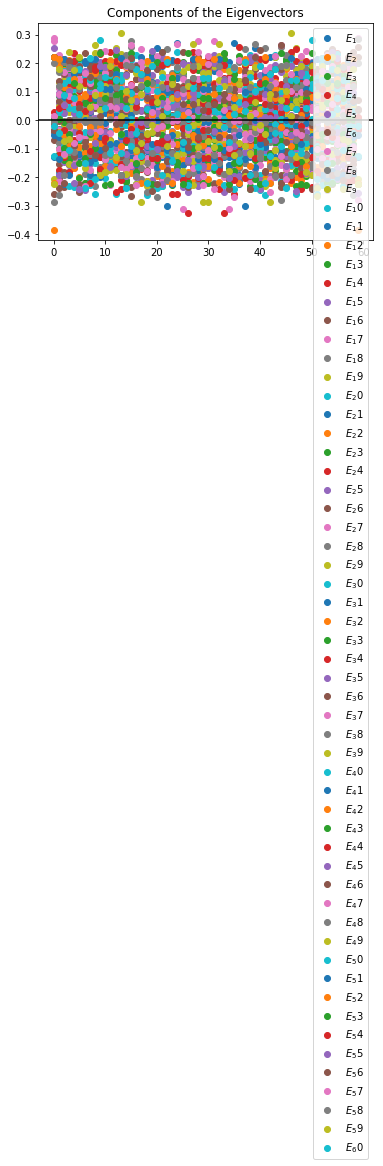

In [98]:
# Plot eigenvectors

for i in range(N):
    plt.plot(evecs[:,i],'o',label=r"$E_"+str(i+1)+"$")

plt.axhline(0,color='k')
plt.title("Components of the Eigenvectors")
plt.legend()
plt.show()

In [84]:
# Delocalization energy
# energy difference from ground state and isolated double bonds (compare to ethylene)
# 

# determine delocalization energy, given total ground state energy and number of double bonds
def calcDeloc(E,numDB):
    Ne_ethy = 2
    evals_ethy = getEigs(ethy)[0]
    E_ethy = energyLevel(evals_ethy,Ne_ethy,show=False)[0]
    ETot_ethy = np.sum(E_ethy)
    deloc = numDB*ETot_ethy - ETot

    return deloc

deloc = calcDeloc(ETot,db)

print(str(deloc)+"b")

2.0b


In [85]:
# Charge density estimation 
# for single electron in orbital I, |c_Ir|^2 is probability of electron being on atom r

def chargeDensity(evecs,energies,occu):
    q = np.zeros(N)
        
    for r in range(N):
        c = evecs[r,:] # get the rth component of all eigenvectors
        cSq = np.square(c)
        q[r] = np.dot(cSq,occu)
    
    return q

q = chargeDensity(evecs,energies,occu)

print(q)

[ 1.  1.  1.  1.  1.  1.]


In [91]:
# Bond order calculation
# Known values:
# Butadiene - 0.89 0.45 0.89
# Benzene - 
# Toluene - 
# Naphthalene - 
# Buckyball - 

def bondOrder(adj,evecs,energies,occu):
    adjUp = np.tril(adj) # remove redundant elements
    r,s = np.nonzero(adjUp) # get indices of nonzero elements
    p = np.zeros(r.size)
    
    for i in range(r.size):
        cr = evecs[r[i],:]
        cs = evecs[s[i],:]
                
        cPr = np.multiply(cr,cs)
                
        p[i] = np.dot(cPr,occu)
    
    return p
    
p = bondOrder(adj,evecs,energies,occu)

print(p)

[ 0.667  0.667  0.667  0.667  0.667  0.667]


[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  1.  0.  1.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


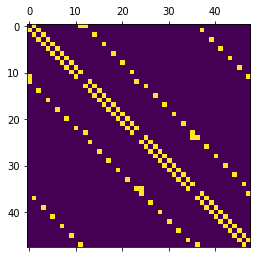

In [121]:
# Part B

zig = 6 # number of 
arm = 2
tiles = zig*arm # total number of hexagonal units
N = tiles*4 # number of carbon atoms
Ne = N

rows = arm * 2 # 
cols = zig * 2  # 

# maps an (i,j) index from the tiled grid to the number of the atom at that location
def indexFind(i,j,rows,cols):
    i = i % cols
    j = j % rows
    
    return j*cols + i

# 
def connect(n1,n2,adjMat):
    adjMat[n1,n2]=1
    return

def constructAdj(rows,cols):
    adjMat = np.zeros([rows*cols,rows*cols])
    
    for i in range(cols):
        for j in range(rows):
            cur = indexFind(i,j,rows,cols)
            connect(cur,indexFind(i+1,j,rows,cols),adjMat)
            connect(cur,indexFind(i-1,j,rows,cols),adjMat)
            if i%2 == j%2:
                connect(cur,indexFind(i,j+1,rows,cols),adjMat)
            else:
                connect(cur,indexFind(i,j-1,rows,cols),adjMat)
 
    return adjMat

graph = constructAdj(rows,cols)
print(graph)

plt.matshow(graph)
plt.show()

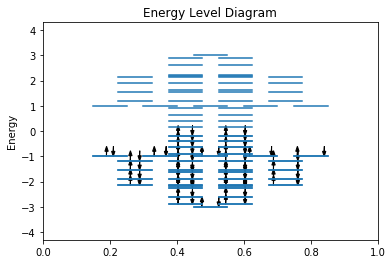

In [120]:
evals,evecs = getEigs(graph)

energies,occu = energyLevel(evals,Ne)